# Netflix Stock Price Prediction

- Netflix stock price prediciton using 2 different models and comaparing the reults
1. Model 1: RNN
2. Model 2: LSTM

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("NFLX.csv")

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [6]:
data.shape

(1009, 7)

In [7]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [11]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [12]:
data.nunique()

Date         1009
Open          976
High          983
Low           989
Close         988
Adj Close     988
Volume       1005
dtype: int64

In [13]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import warnings
warnings.filterwarnings('ignore')

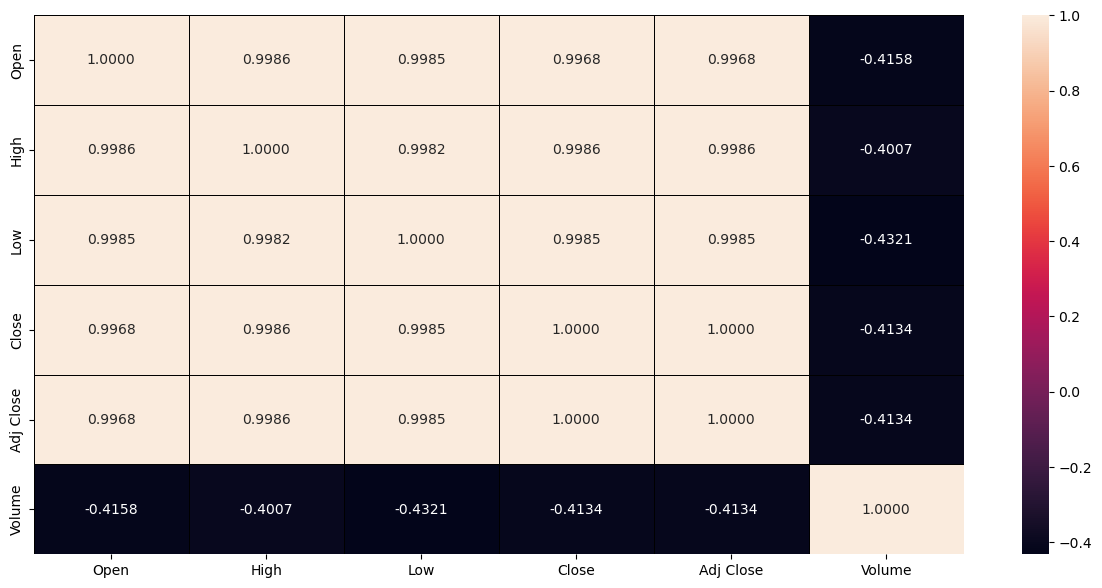

In [16]:
f, ax = plt.subplots(figsize = (15,7))
sns.heatmap(data.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

In [17]:
data_set = data.loc[:, ["Open"]].values
data_set

array([[262.      ],
       [247.699997],
       [266.579987],
       ...,
       [448.25    ],
       [421.440002],
       [407.309998]])

In [18]:
train = data_set[:len(data_set) - 50] 
test = data_set[len(train):]

train.reshape(train.shape[0],1) 
train.shape


(959, 1)

In [19]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range = (0,1)) 
train_scaler = scaler.fit_transform(train)
train_scaler

array([[0.06125254],
       [0.03005911],
       [0.07124314],
       [0.07233381],
       [0.04347449],
       [0.03974435],
       [0.05097837],
       [0.05791507],
       [0.07876885],
       [0.09774669],
       [0.0955871 ],
       [0.10503242],
       [0.10898067],
       [0.10269835],
       [0.11960388],
       [0.13273563],
       [0.1290928 ],
       [0.12832931],
       [0.11066029],
       [0.15036104],
       [0.18750957],
       [0.18777132],
       [0.19257033],
       [0.1906725 ],
       [0.21735053],
       [0.19621317],
       [0.18375763],
       [0.19468625],
       [0.19086888],
       [0.17860959],
       [0.17306899],
       [0.17980938],
       [0.17265452],
       [0.16030803],
       [0.16456164],
       [0.19320288],
       [0.1406322 ],
       [0.1157865 ],
       [0.12656241],
       [0.11240542],
       [0.08662175],
       [0.12920184],
       [0.12036736],
       [0.12619155],
       [0.13908339],
       [0.15042648],
       [0.16534696],
       [0.181

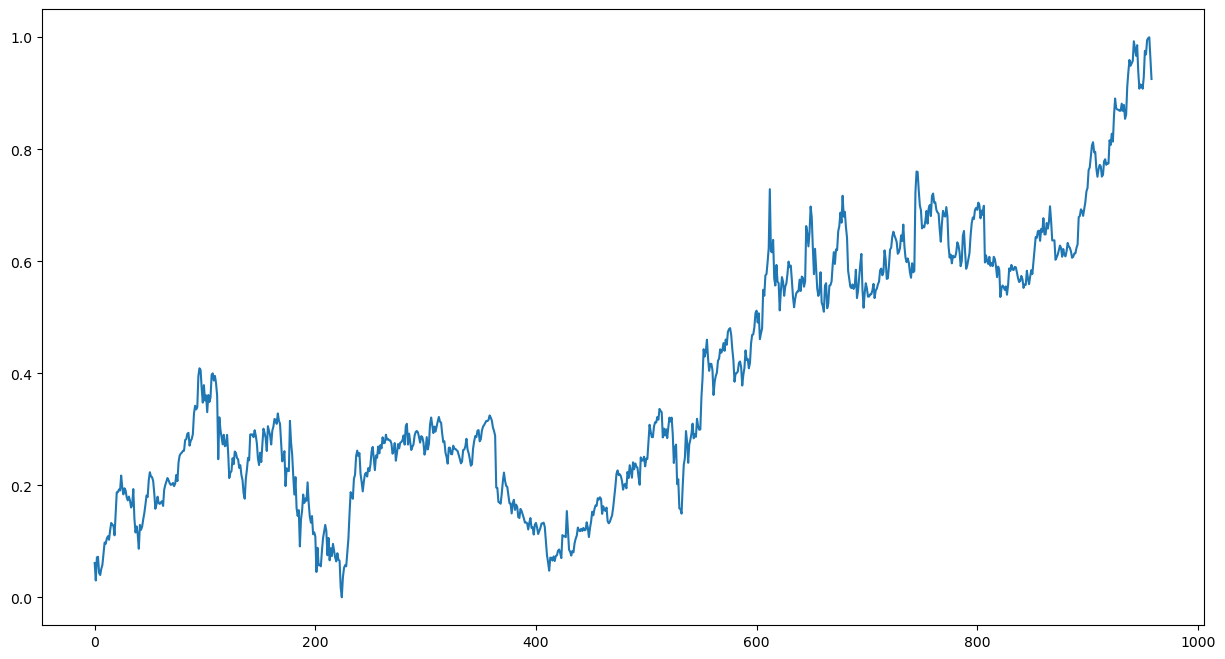

In [20]:
plt.figure(figsize=[15,8]) 
plt.plot(train_scaler)
plt.show()

In [21]:
import numpy as np

In [22]:
X_train = [] 
Y_train = []
timesteps = 50

for i in range(timesteps, len(train_scaler)):
    X_train.append(train_scaler[i - timesteps:i, 0]) 
    Y_train.append(train_scaler[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [23]:
X_train.shape

(909, 50, 1)

In [24]:
X_train

array([[[0.06125254],
        [0.03005911],
        [0.07124314],
        ...,
        [0.18185986],
        [0.17902405],
        [0.20884325]],

       [[0.03005911],
        [0.07124314],
        [0.07233381],
        ...,
        [0.17902405],
        [0.20884325],
        [0.22332743]],

       [[0.07124314],
        [0.07233381],
        [0.04347449],
        ...,
        [0.20884325],
        [0.22332743],
        [0.21586722]],

       ...,

       [[0.79453786],
        [0.79543229],
        [0.76559133],
        ...,
        [0.96928657],
        [0.99487386],
        [0.99838581]],

       [[0.79543229],
        [0.76559133],
        [0.75093253],
        ...,
        [0.99487386],
        [0.99838581],
        [1.        ]],

       [[0.76559133],
        [0.75093253],
        [0.76430427],
        ...,
        [0.99838581],
        [1.        ],
        [0.96437852]]])

In [25]:
Y_train.shape

(909,)

In [26]:
Y_train

array([0.22332743, 0.21586722, 0.21442752, 0.20773073, 0.18606986,
       0.1580394 , 0.16595774, 0.17959123, 0.16829181, 0.16674299,
       0.16955697, 0.17160745, 0.16314377, 0.1921122 , 0.20064132,
       0.20694548, 0.21285694, 0.20882141, 0.20358617, 0.20072859,
       0.20147025, 0.20419694, 0.19845996, 0.20328074, 0.21841938,
       0.20749082, 0.24086557, 0.25299392, 0.2564841 , 0.25838187,
       0.2615012 , 0.26167575, 0.28087167, 0.28226777, 0.29199661,
       0.29365447, 0.27079381, 0.27912661, 0.28287855, 0.29145127,
       0.32796719, 0.34201514, 0.3354929 , 0.33937572, 0.39532754,
       0.40891743, 0.40586354, 0.37251055, 0.34762125, 0.37877104,
       0.35137319, 0.36051308, 0.33054124, 0.36116746, 0.34875553,
       0.35671754, 0.39707267, 0.39988657, 0.38701657, 0.39534938,
       0.38232666, 0.36005502, 0.24655895, 0.32135768, 0.29915147,
       0.28575796, 0.27317148, 0.29016428, 0.26972496, 0.27107739,
       0.28996797, 0.25742207, 0.21287877, 0.22238946, 0.22535

### 1. RNN Model

In [27]:
#Import Library
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

# Initialising the RNN
regressor = Sequential()

# Add the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape=( 50, 1 )))
regressor.add(Dropout(0.2))

# Second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

# Third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True)) 
regressor.add(Dropout(0.2))

# Fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50)) 
regressor.add(Dropout(0.2))

# Add the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = "adam", loss = "mean_squared_error")

# Fitting the RNN to the training set
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)


Epoch 1/100
29/29 [==============================] - 3s 20ms/step - loss: 0.4820
Epoch 2/100
29/29 [==============================] - 1s 20ms/step - loss: 0.2808
Epoch 3/100
29/29 [==============================] - 1s 20ms/step - loss: 0.2484
Epoch 4/100
29/29 [==============================] - 1s 21ms/step - loss: 0.1900
Epoch 5/100
29/29 [==============================] - 1s 20ms/step - loss: 0.1665
Epoch 6/100
29/29 [==============================] - 1s 19ms/step - loss: 0.1518
Epoch 7/100
29/29 [==============================] - 1s 20ms/step - loss: 0.1234
Epoch 8/100
29/29 [==============================] - 1s 20ms/step - loss: 0.1150
Epoch 9/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0878
Epoch 10/100
29/29 [==============================] - 1s 20ms/step - loss: 0.0831
Epoch 11/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0814
Epoch 12/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0631
Epoch 13/100
29/29 [=====

In [28]:
inputs = data_set[len(data_set) - len(test) - timesteps:]
inputs = scaler.transform(inputs)

In [29]:
X_test = []
for i in range(timesteps, inputs.shape[0]): 
    X_test.append(inputs[i - timesteps:i, 0])

X_test_rnn = np.array(X_test)
X_test_rnn = np.reshape(X_test_rnn, (X_test_rnn.shape[0], X_test_rnn.shape[1], 1)) 
predicted_stock_price = regressor.predict(X_test_rnn)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


2/2 [==============================] - 0s 6ms/step


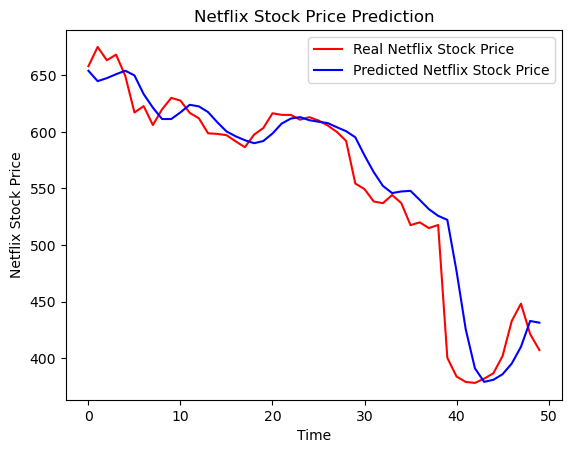

In [30]:
# visualising the results
plt.plot(test, color = "red", label = "Real Netflix Stock Price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted Netflix Stock Price") 
plt.title("Netflix Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Netflix Stock Price")
plt.legend()
plt.show()

### 2. LSTM Model

In [31]:
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

In [32]:
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [33]:
model = Sequential()
model.add(LSTM(10, input_shape = (1, timesteps))) 
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam") 
model.fit(trainX, Y_train, epochs = 50, batch_size = 1)

Epoch 1/50
909/909 [==============================] - 2s 1ms/step - loss: 0.0057
Epoch 2/50
909/909 [==============================] - 1s 1ms/step - loss: 0.0022
Epoch 3/50
909/909 [==============================] - 1s 1ms/step - loss: 0.0017
Epoch 4/50
909/909 [==============================] - 1s 1ms/step - loss: 0.0015
Epoch 5/50
909/909 [==============================] - 1s 1ms/step - loss: 0.0014
Epoch 6/50
909/909 [==============================] - 1s 1ms/step - loss: 0.0013
Epoch 7/50
909/909 [==============================] - 1s 1ms/step - loss: 0.0013
Epoch 8/50
909/909 [==============================] - 1s 1ms/step - loss: 0.0012
Epoch 9/50
909/909 [==============================] - 1s 992us/step - loss: 0.0013
Epoch 10/50
909/909 [==============================] - 1s 1ms/step - loss: 0.0010
Epoch 11/50
909/909 [==============================] - 1s 989us/step - loss: 9.9446e-04
Epoch 12/50
909/909 [==============================] - 1s 1ms/step - loss: 0.0011
Epoch 13/50
909/9

In [34]:
testX = np.array(X_test)
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])

predict_lstm = model.predict(testX)
predict_lstm = scaler.inverse_transform(predict_lstm)

2/2 [==============================] - 0s 3ms/step


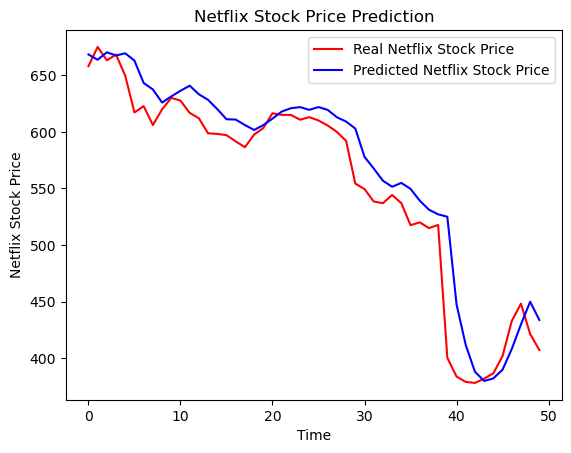

In [35]:
plt.plot(test, color = "red", label = "Real Netflix Stock Price")
plt.plot(predict_lstm, color = "blue", label = "Predicted Netflix Stock Price") 
plt.title("Netflix Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Netflix Stock Price")
plt.legend()
plt.show()

In [36]:
import tensorflow as tf

In [37]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)
 
  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
 
  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)
 
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [38]:
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true-y_pred))
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
    return mae/mae_naive_no_season

In [39]:
model_LSTM_result = evaluate_preds(test, predict_lstm)
model_LSTM_result

{'mae': 19.629396,
 'mse': 771.58923,
 'rmse': 19.629396,
 'mape': 3.9108748,
 'mase': 1.6485673}

In [40]:
model_RNN_result = evaluate_preds(test, predicted_stock_price)
model_RNN_result

{'mae': 18.12453,
 'mse': 794.8809,
 'rmse': 18.12453,
 'mape': 3.7438478,
 'mase': 1.5221817}

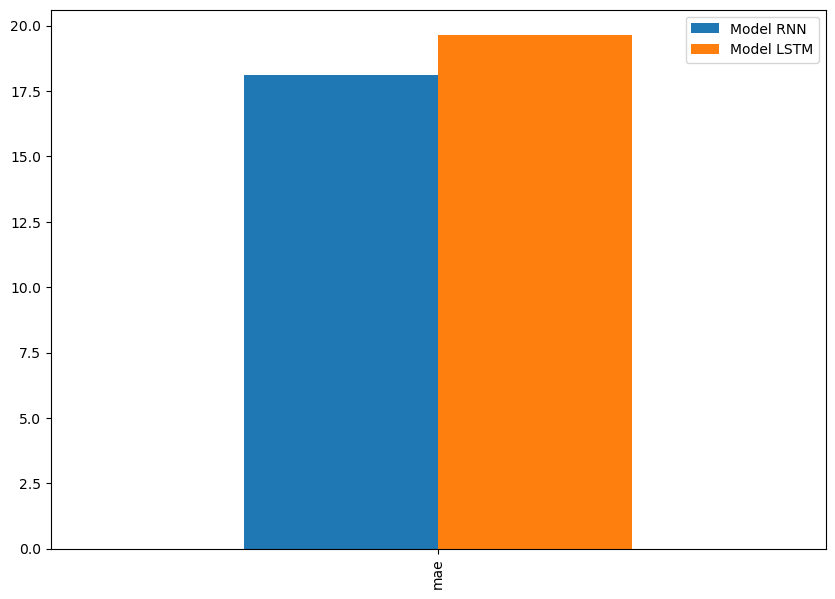

In [41]:
pd.DataFrame({"Model RNN": model_RNN_result["mae"], 
              "Model LSTM": model_LSTM_result["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");